<a href="https://colab.research.google.com/github/Muhammad-Ikhwan-Fathulloh/FGD-Kelompok-4-Linear-and-Logistic-Regression/blob/main/KELOMPOK_4_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 4 Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_hargarumah = pd.read_csv('datasetrumah3.csv')
df_hargarumah

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180.0,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170.0,400,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770.0,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050.0,910,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680.0,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,1530.0,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,2310.0,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,1020.0,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,1600.0,0,98027,47.5345,-122.069,1410,1287


In [ ]:
del df_hargarumah['sqft_above']

In [ ]:
df_hargarumah.shape

(21613, 12)

In [ ]:
df_hargarumah.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,400,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,910,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_hargarumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   sqft_basement  21613 non-null  int64  
 7   zipcode        21613 non-null  int64  
 8   lat            21613 non-null  float64
 9   long           21613 non-null  float64
 10  sqft_living15  21613 non-null  int64  
 11  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 2.0 MB


In [ ]:
df_hargarumah.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_hargarumah.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

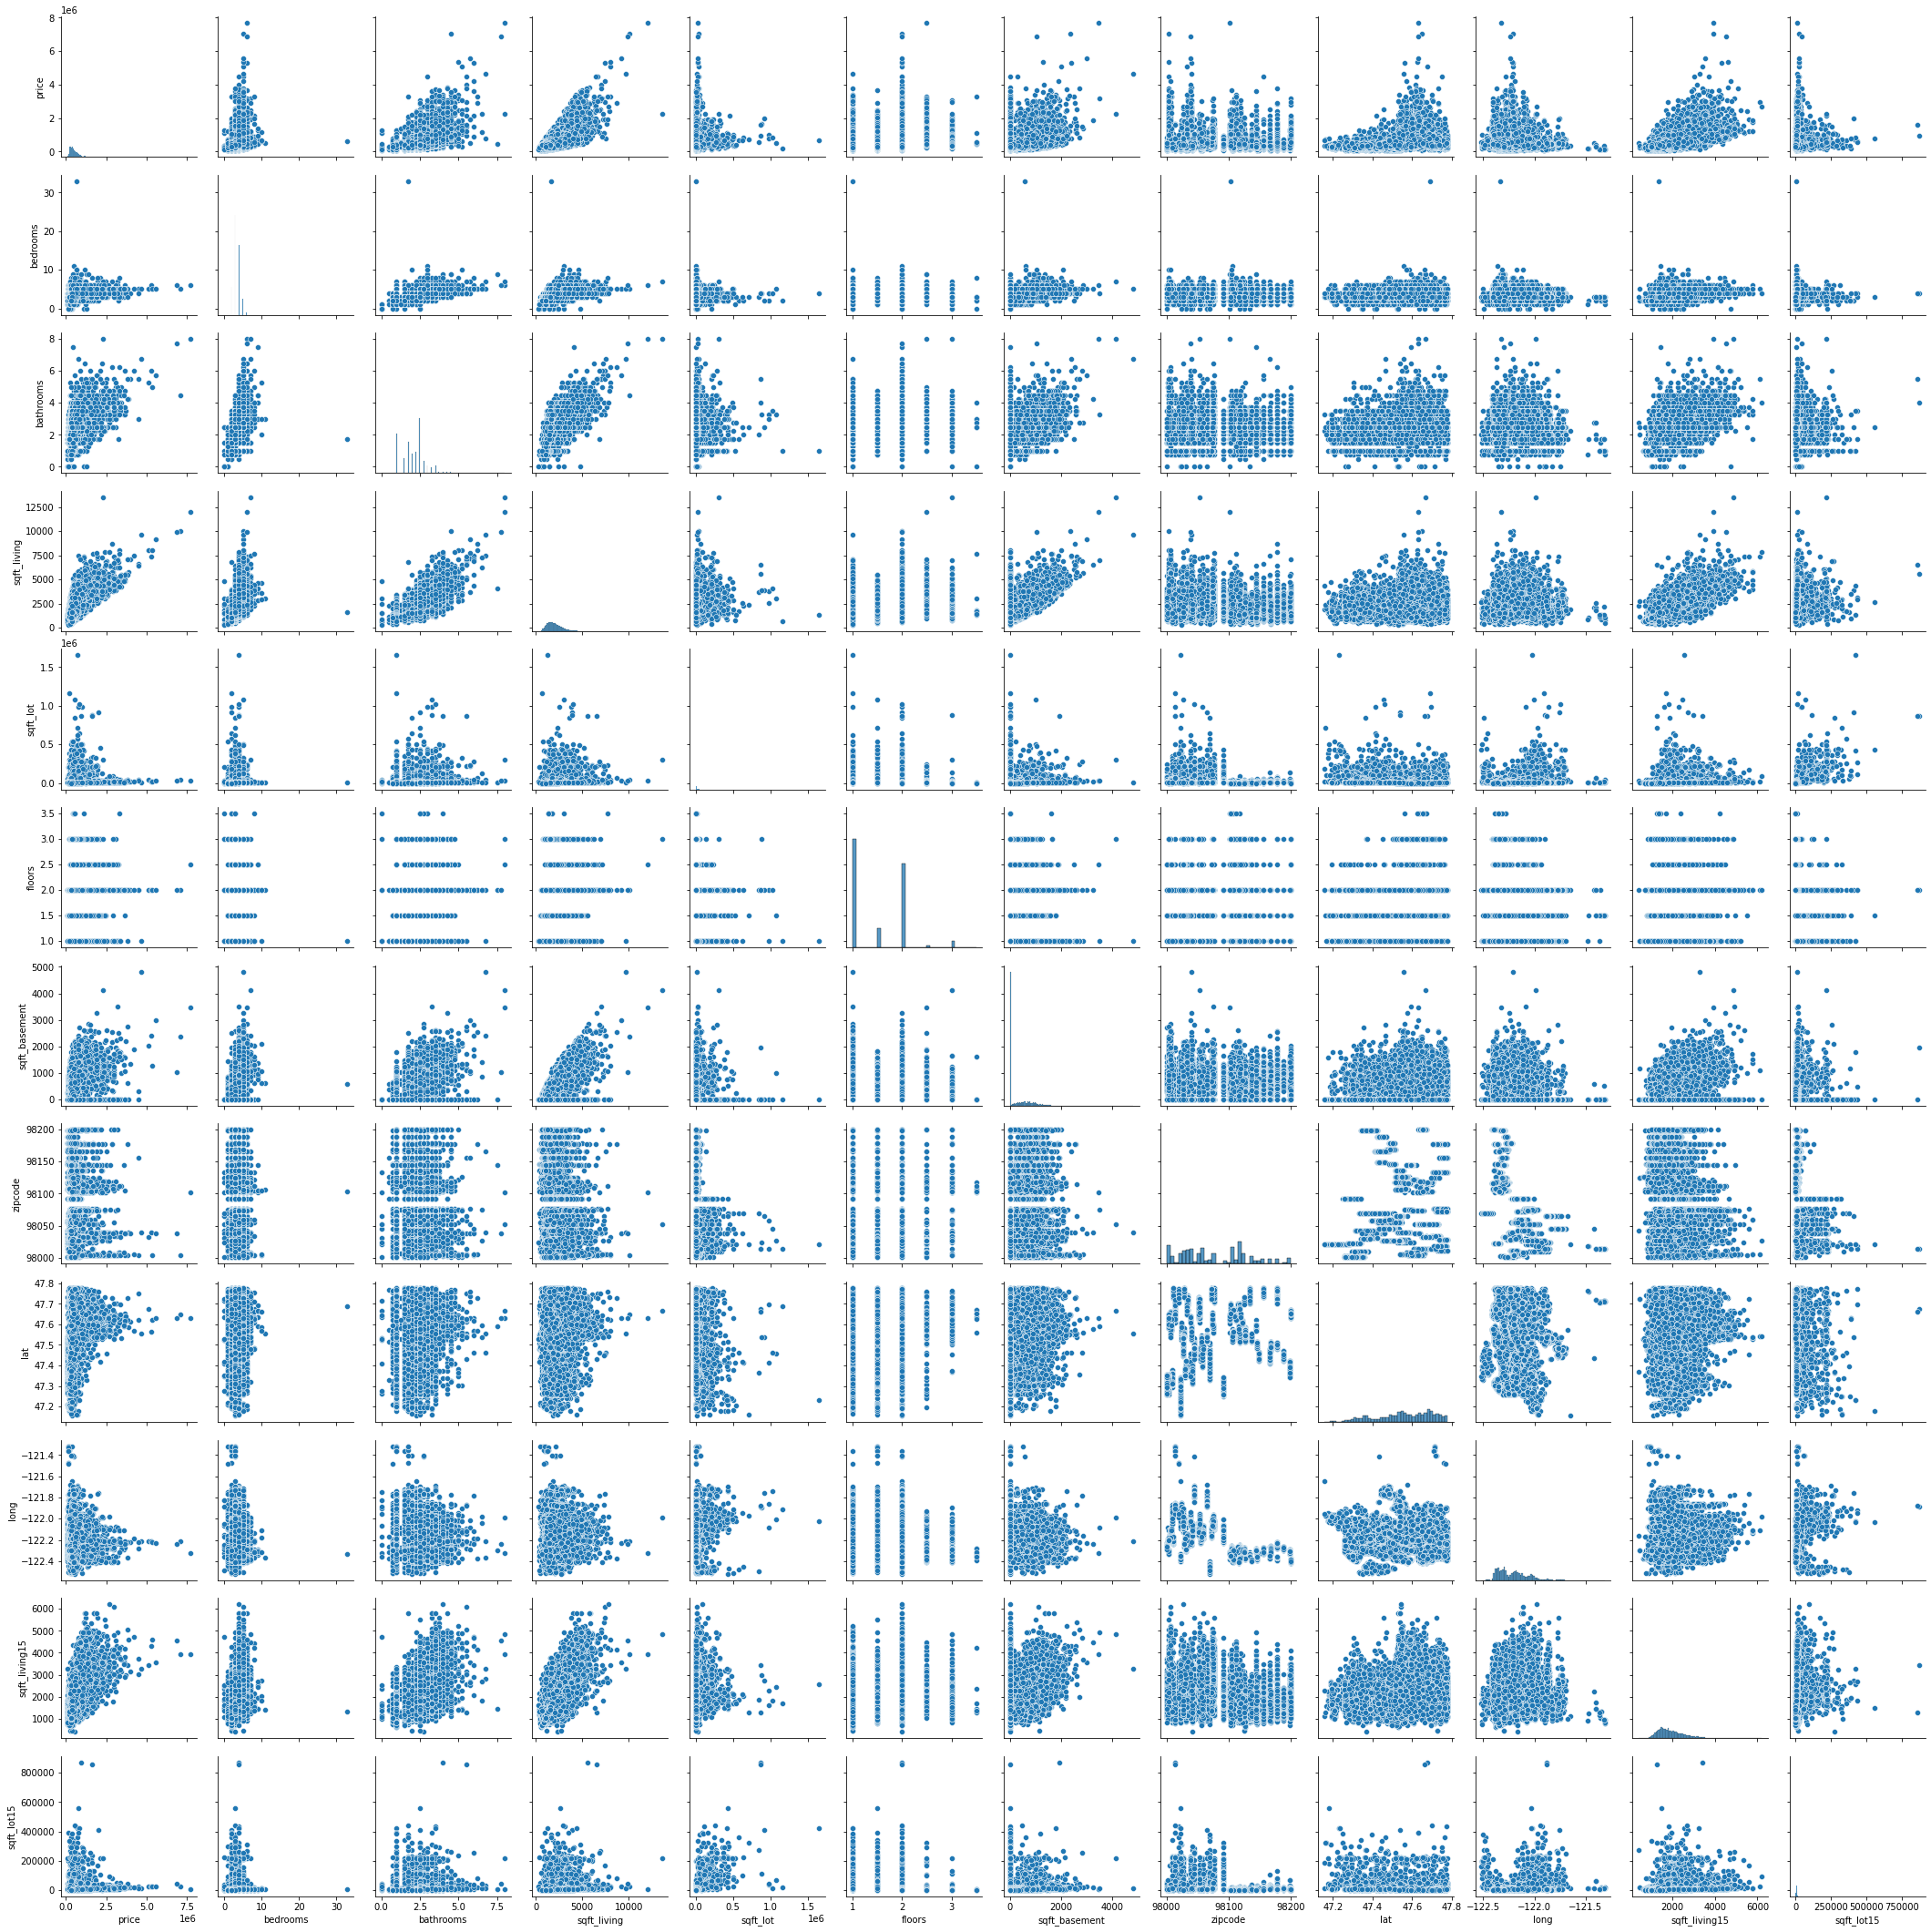

In [ ]:
sns.pairplot(df_hargarumah)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


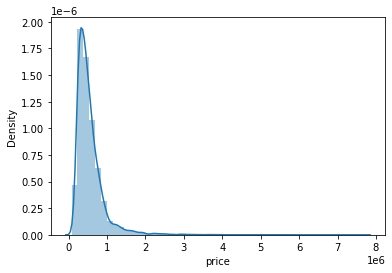

In [ ]:
sns.distplot(df_hargarumah['price'])

In [ ]:
X = df_hargarumah[['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors'	,	'sqft_basement',	'zipcode',	'lat'	,'long'	,'sqft_living15',	'sqft_lot15']]
y = df_hargarumah['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-51602541.68064146


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-54003.852439
bathrooms,16278.035212
sqft_living,270.147686
sqft_lot,0.318939
floors,-11445.783528
sqft_basement,-21.782525
zipcode,-411.729931
lat,689194.804859
long,-484394.446646
sqft_living15,78.816203


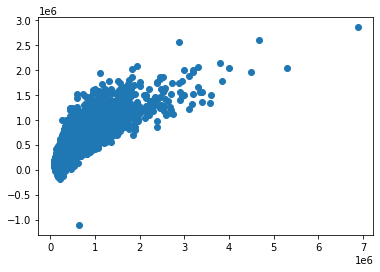

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


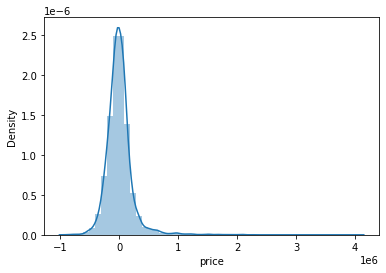

In [ ]:
sns.distplot((y_test-predictions), bins=50)

In [ ]:
lm.predict([[21613.000000,	21613.000000,	21613.000000,	2.161300e+04,	21613.000000,	21613.000000,	21613.000000,	21613.000000,	21613.000000,	21613.000000,	21613.000000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3.31017307e+09])